# Udacity DAND Project: Wrangle and Analyze Data

by Shawn Gong
*******

## Preparation: Importing Required Libraries

In [2]:
## Import Necessary Library
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from tqdm import *
import matplotlib.pyplot as plt
import sqlalchemy
import datetime

In [3]:
os.getcwd()

'/Users/gongxiaoyang/Desktop/Online Course/Udacity/Data Wrangling/Project- Wrangle and Analyze Data'

## Gathering Data

### Load Data downloaded manually

In [4]:
## Load the manually downloaded data
df_info = pd.read_csv('Gathered_Data/twitter-archive-enhanced.csv')

In [5]:
df_info.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Download data programmatically using requests library

In [6]:
# Open the url with a file handle
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Write the content of url to a domestic file
with open('Gathered_Data/image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [7]:
df_ip = pd.read_csv('Gathered_Data/image-predictions.tsv', sep = '\t')

In [8]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Download Data using Twitter API

In [9]:
# Load the API key and token in a dataframe
api_access = pd.read_csv('Gathered_Data/tokens.csv', sep = '\t', index_col = 0)

In [10]:
consumer_key = api_access.iloc[0,0]
consumer_secret = api_access.iloc[1,0]
access_token = api_access.iloc[2,0]
access_token_secret = api_access.iloc[3,0]

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = df_info['tweet_id'].astype(list)

In [12]:
tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [13]:
## Using the API to retrieve data
non_exist_ids = []
if not os.path.exists('Gathered_Data/tweet_json.txt'):
    with open('Gathered_Data/tweet_json.txt', mode = 'a', encoding = 'UTF-8') as file:
        for tweet_id in tqdm(tweet_ids):
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')._json
                json.dump(tweet, file)
                file.write('\n')
            except:
                print('Problem encountered when retriving content from tweet: {}, tweet do not exist'.format(tweet_id))
                non_exist_ids.append(tweet_id)

  1%|          | 20/2356 [00:04<08:39,  4.49it/s]

Problem encountered when retriving content from tweet: 888202515573088257, tweet do not exist


  4%|▍         | 96/2356 [00:21<08:27,  4.45it/s]

Problem encountered when retriving content from tweet: 873697596434513921, tweet do not exist


  5%|▌         | 119/2356 [00:26<08:22,  4.46it/s]

Problem encountered when retriving content from tweet: 869988702071779329, tweet do not exist


  6%|▌         | 133/2356 [00:29<08:18,  4.46it/s]

Problem encountered when retriving content from tweet: 866816280283807744, tweet do not exist


  7%|▋         | 156/2356 [00:35<08:16,  4.43it/s]

Problem encountered when retriving content from tweet: 861769973181624320, tweet do not exist


 11%|█         | 248/2356 [00:56<08:00,  4.39it/s]

Problem encountered when retriving content from tweet: 845459076796616705, tweet do not exist


 11%|█         | 261/2356 [00:59<07:57,  4.39it/s]

Problem encountered when retriving content from tweet: 842892208864923648, tweet do not exist


 13%|█▎        | 299/2356 [01:08<07:48,  4.39it/s]

Problem encountered when retriving content from tweet: 837012587749474308, tweet do not exist


 16%|█▋        | 383/2356 [01:28<07:34,  4.34it/s]

Problem encountered when retriving content from tweet: 827228250799742977, tweet do not exist


 24%|██▍       | 567/2356 [02:09<06:49,  4.37it/s]

Problem encountered when retriving content from tweet: 802247111496568832, tweet do not exist


 33%|███▎      | 785/2356 [03:00<06:00,  4.36it/s]

Problem encountered when retriving content from tweet: 775096608509886464, tweet do not exist


100%|██████████| 2356/2356 [32:18<00:00,  1.22it/s]


In [16]:
non_exist_ids = pd.Series(non_exist_ids).astype(str)

In [21]:
non_exist_ids.to_csv('Gathered_Data/non_exist_ids.tsv')

In [14]:
tweets = []

with open('Gathered_Data/tweet_json.txt', mode = 'r') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweets.append(tweet)

In [15]:
df_tweets = pd.DataFrame(tweets)

In [16]:
df_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38805,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8590,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33246,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6312,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25041,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4191,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42182,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8708,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40341,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9475,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
df_tweets = df_tweets.drop(labels = ['contributors', 'coordinates'], axis = 1)

In [18]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 30 columns):
created_at                       2345 non-null object
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null object
id                               2345 non-null int64
id_str                           2345 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2345 non-null bool
lang                             2345 non-null

In [19]:
df_stat = df_tweets[['id', 'retweet_count', 'favorite_count']]

In [20]:
df_stat.head()

,id,retweet_count,favorite_count
0,892420643555336193,8590,38805
1,892177421306343426,6312,33246
2,891815181378084864,4191,25041
3,891689557279858688,8708,42182
4,891327558926688256,9475,40341


In [21]:
# Save the dataset to domestic work directory
df_stat.to_csv('Gathered_Data/tweet_json.csv')

In [22]:
# Copy the dataset for cleaning purposes
df_stat_clean = df_stat.copy()
df_ip_clean = df_ip.copy()
df_info_clean = df_info.copy()

## Assessing the Data

### Visual Assessment

In [23]:
df_stat_clean

,id,retweet_count,favorite_count
0,892420643555336193,8590,38805
1,892177421306343426,6312,33246
2,891815181378084864,4191,25041
3,891689557279858688,8708,42182
4,891327558926688256,9475,40341
5,891087950875897856,3135,20230
6,890971913173991426,2088,11863
7,890729181411237888,19041,65547
8,890609185150312448,4298,27778
9,890240255349198849,7473,31953


In [24]:
df_info_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
df_ip_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Issue detected from visual assessment

Quality:
- The `timestamp` variable in the `df_info` dataframe contains all the time information in a single column.

- Some ids cannot be found using twitter API.

- There are some unnecessary variables including `source`, `expanded_url` in the `df_info` dataframe.


Tidiness:

- There's four variables describe the stage of a dog, which could be reduced to one.

- Separating the rating denomimator and numerator is unnecessary because that they form a single variable together.

- The `df_stat` dataframe can be merged into `df_info` dataframe.

### Programmatic Assessment

#### df_info

In [26]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
df_info_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
df_dn = df_info_clean[df_info_clean.name.duplicated(keep = False)]

In [29]:
## Investigate the retweets
df_dn.loc[df_dn['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


#### df_stat

In [30]:
df_stat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [31]:
df_stat

,id,retweet_count,favorite_count
0,892420643555336193,8590,38805
1,892177421306343426,6312,33246
2,891815181378084864,4191,25041
3,891689557279858688,8708,42182
4,891327558926688256,9475,40341
5,891087950875897856,3135,20230
6,890971913173991426,2088,11863
7,890729181411237888,19041,65547
8,890609185150312448,4298,27778
9,890240255349198849,7473,31953


#### df_ip

In [32]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_ip_clean[df_ip_clean.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


### Issues detected from programmatic assessment
Quality:
- The data types of `tweet_id`, `in_reply_to_status_id` and `in_reply_to_user_id` variables are integer or float.

- The `timestamp` variable should be a datetime variable instead of object.

- The variable name in `df_stat` mismatch the same variable `tweet_id` in the `df_info` dataframe.

- Many missing values in `df_info` dataframe has a value of object "None" instead of NaN as value.

- Some obeservations are retweets or response of previous tweets, which result in duplicated data.

- Some observations in the `df_ip` dataframe are not dogs.

### Summary of quality and quantity issues

Quality:
- The data types of `tweet_id`, `in_reply_to_status_id` and `in_reply_to_user_id` variables are integer or float.

- The `timestamp` variable should be a datetime variable instead of object.

- The variable name in `df_stat` mismatch the same variable `tweet_id` in the `df_info` dataframe.

- Many missing values in `df_info` dataframe has a value of object "None" instead of NaN as value.

- Some obeservations are retweets of previous tweets, which result in duplicated data.

- The `timestamp` variable in the `df_info` dataframe contains unnecessary information.

- Some ids cannot be found using twitter API.

- There are some unnecessary variables including `source`, `expanded_url` in the `df_info` dataframe.

- Some observations in the `df_ip` dataframe are not dogs.


Tidiness:

- There's four variables describe the stage of a dog, which could be reduced to one.

- Separating the rating denominator and numerator is unnecessary because that they form a single variable together.

- The `df_stat` dataframe can be merged into `df_info` dataframe.

## Data Cleaning

### Defining the cleaning steps

Quality:

- Change the data types of relevant variables (tweet_id, in_reply_to_status_id, in_reply_to_user_id) to object.

- Change the data type of variable `timestamp` to datetime.

- Change the variable name of the `df_stat` dataframe to make it comparable to the one in `df_info` dataframe.

- Replace the `None` values with null.

- Remove the retweets and response since they are duplicates of other existing data in the dataframe.

- Reformat the `timestamp` variable to make it shorter and clearer in the `df_info` dataframe.

- Remove the non-existing tweets from all three dataframe based on the data stored in the `non_exist_ids` dataframe.

- Remove the unnecessary variables from the `df_info` dataframe.

- Remove the observations in the `df_ip` dataframe that is not a dog or not likely to be a dog and merge it into the `df_info` dataframe.

Tidiness:

- Merge the four variables describing the stage of the dog into one.

- Divide the `rating_numerator` by the `rating_denominator` to get the rating as a percentage. (Although it might be a unique "feature" of this twitter account)

- Merge the `df_stat` dataframe into the df_info dataframe.

### Coding and Testing

#### Rename the `id` to `tweet_id` for merging the dataframe

In [34]:
df_stat_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Testing

In [35]:
df_stat_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


#### Merge the `df_stat` into `df_info`

In [36]:
df_info_clean = pd.merge(df_info_clean, df_stat_clean, on = 'tweet_id', how = 'left')

#### Testing

In [37]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

#### Change the data type of tweet_id to `str`

In [38]:
df_info_clean.tweet_id = df_info_clean.tweet_id.astype(str)

#### Testing

In [39]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2

#### Do the same thing for `df_ip_clean` dataframe

In [40]:
df_ip_clean.tweet_id = df_ip_clean.tweet_id.astype(str)

#### Testing

In [41]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Replace the None value to actual NaN

In [42]:
df_info_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8590.0,38805.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6312.0,33246.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4191.0,25041.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8708.0,42182.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9475.0,40341.0


In [43]:
df_info_clean.replace('None', np.nan, inplace = True)

#### Testing

In [44]:
df_info_clean.sample(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,NaN,NaN,NaN,NaN,462.0,837.0
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,NaN,NaN,NaN,NaN,NaN,248.0,461.0
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN,NaN,NaN
2150,669683899023405056,NaN,NaN,2015-11-26 01:07:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,NaN,NaN,NaN,NaN,116.0,408.0
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,NaN,NaN,NaN,NaN,NaN,1035.0,3158.0
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,NaN,NaN,NaN,NaN,118.0,496.0
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,NaN,NaN,NaN,NaN,11133.0,34256.0
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,NaN,NaN,NaN,NaN,NaN,1466.0,5145.0
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,NaN,NaN,NaN,NaN,1351.0,3013.0
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815...,8,10,Frank,NaN,NaN,NaN,NaN,561.0,844.0


#### Drop the unnecessary variables: source and expanded_url 

In [45]:
df_info_clean.drop(['source', 'expanded_urls'], axis = 1, inplace = True)

#### Testing

In [46]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
retweet_count                 2345 non-null float64
favorite_count                2345 non-null float64
dtypes: float64(6), int64(2), object

#### Merge the four variable describing dog stages into one

In [47]:
## Get a series with no null value of dog stages
dog_stage = pd.concat([df_info_clean['doggo'].dropna(), 
                                          df_info_clean['floofer'].dropna(), 
                                          df_info_clean['pupper'].dropna(), 
                                          df_info_clean['puppo'].dropna()]).sort_index()

In [48]:
df_info_clean = pd.merge(df_info_clean, 
                           pd.DataFrame(dog_stage), 
                           how = 'outer', left_index = True, right_index = True)

In [49]:
df_info_clean.rename(columns = {0 : 'dog_stage'}, inplace = True)

In [50]:
df_info_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Testing

In [51]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          1617 non-null object
retweet_count                 2359 non-null float64
favorite_count                2359 non-null float64
dog_stage                     394 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 277.7+ KB


#### Droping the rows containing the tweets that cannot be retrived by Twitter API

In [55]:
non_exist_ids = pd.read_csv('Gathered_Data/non_exist_ids.tsv', sep = '\t')
non_exist_tweets = []
for tweetid in non_exist_ids:
    non_exist_tweets.append(df_info_clean[df_info_clean.tweet_id == tweetid].index)

In [56]:
## Define a function for similiar operations
def drop_rows(target_dataframe, data, on = 'variable'):
    data = data.tolist()
    for i in data:
        i = str(i)
        index = target_dataframe[target_dataframe[on] == i].index
        target_dataframe.drop(index, axis = 0, inplace = True)

In [57]:
for tweet_id in non_exist_tweets:
        df_info_clean.drop(tweet_id, inplace = True)

In [58]:
for tweet_id in non_exist_tweets:
    df_ip_clean.drop(tweet_id, inplace = True)

#### Testing

In [59]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2370 non-null object
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          1617 non-null object
retweet_count                 2359 non-null float64
favorite_count                2359 non-null float64
dog_stage                     394 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 277.7+ KB


In [60]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.2+ KB


#### Remove the retweets and response in the dataframes

In [61]:
## Get the indexes of replies and retweets
replies = df_info_clean[df_info_clean.in_reply_to_status_id.notnull()].index
retweets = df_info_clean[df_info_clean.retweeted_status_id.notnull()].index

In [62]:
## Get the ids for the replies and retweets for further use
replies_id = df_info_clean[df_info_clean.in_reply_to_status_id.notnull()].tweet_id
retweets_id = df_info_clean[df_info_clean.retweeted_status_id.notnull()].tweet_id

In [63]:
df_info_clean.drop(replies, inplace = True)

In [64]:
df_info_clean.drop(retweets, inplace = True)

#### Testing

In [65]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2108 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2108 non-null object
text                          2108 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2108 non-null int64
rating_denominator            2108 non-null int64
name                          1499 non-null object
retweet_count                 2108 non-null float64
favorite_count                2108 non-null float64
dog_stage                     347 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 247.0+ KB


In [66]:
## There's no responses and retweets left, so we can drop the entire column for tidier dataframe.
df_info_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp'], axis = 1, inplace = True)

In [67]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null object
text                  2108 non-null object
rating_numerator      2108 non-null int64
rating_denominator    2108 non-null int64
name                  1499 non-null object
retweet_count         2108 non-null float64
favorite_count        2108 non-null float64
dog_stage             347 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 164.7+ KB


In [68]:
## Drop the same tweets from the df_ip_clean dataframe
drop_rows(df_ip_clean, replies_id, on = 'tweet_id')

#### Testing

In [69]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2052 non-null object
jpg_url     2052 non-null object
img_num     2052 non-null int64
p1          2052 non-null object
p1_conf     2052 non-null float64
p1_dog      2052 non-null bool
p2          2052 non-null object
p2_conf     2052 non-null float64
p2_dog      2052 non-null bool
p3          2052 non-null object
p3_conf     2052 non-null float64
p3_dog      2052 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 166.3+ KB


It seems that the `df_ip_clean` does not contain any response or retweet already.

#### Remove the observations that are not dogs or not likely to be a dog and merge it into the df_info dataframe

In [70]:
## Remove the observations that are definitely not dogs
not_dog = df_ip_clean[(df_ip_clean["p1_dog"] == False) &
         (df_ip_clean["p2_dog"] == False) &
         (df_ip_clean["p3_dog"] == False)]["tweet_id"].index



# Put both series into the same variable
remove_row = not_dog

df_ip_clean.drop(remove_row, inplace=True)

In [71]:
df_info_clean = pd.merge(df_info_clean, df_ip_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [72]:
df_info_clean.drop_duplicates('tweet_id', inplace = True)

In [73]:
df_info_clean.drop('img_num', axis = 1, inplace = True)

In [74]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1674
Data columns (total 19 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null object
text                  1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1266 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
dog_stage             257 non-null object
jpg_url               1666 non-null object
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null bool
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-null bool
p3                    1666 non-null object
p3_conf               1666 non-null float64
p3_dog                1666 non-null bool
dtypes: bool(3), float64(5), int64(2), object(9)
memory usage: 226.1+ KB


#### Reformat the `rating_numerator` and `rating_denominator` variable and create a new variable of rating as a percentage.

In [75]:
## Get the real rating percentage
df_info_clean['rating_percentage'] = df_info_clean['rating_numerator'] / df_info_clean['rating_denominator'] * 100

In [76]:
df_info_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

#### Testing

In [77]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1674
Data columns (total 18 columns):
tweet_id             1666 non-null object
timestamp            1666 non-null object
text                 1666 non-null object
name                 1266 non-null object
retweet_count        1666 non-null float64
favorite_count       1666 non-null float64
dog_stage            257 non-null object
jpg_url              1666 non-null object
p1                   1666 non-null object
p1_conf              1666 non-null float64
p1_dog               1666 non-null bool
p2                   1666 non-null object
p2_conf              1666 non-null float64
p2_dog               1666 non-null bool
p3                   1666 non-null object
p3_conf              1666 non-null float64
p3_dog               1666 non-null bool
rating_percentage    1666 non-null float64
dtypes: bool(3), float64(6), object(9)
memory usage: 213.1+ KB


In [78]:
df_info_clean.head(20)

,tweet_id,timestamp,text,name,retweet_count,favorite_count,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_percentage
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,6312.0,33246.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,130.0
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,4191.0,25041.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,120.0
2,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,8708.0,42182.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,130.0
3,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,9475.0,40341.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,120.0
4,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,NaN,3135.0,20230.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,130.0
5,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,Jax,2088.0,11863.0,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,130.0
6,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,NaN,19041.0,65547.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,130.0
7,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,Zoey,4298.0,27778.0,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,130.0
8,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,Cassie,7473.0,31953.0,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,140.0
9,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,Koda,7393.0,30665.0,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,130.0


#### Change the data type of  `timestamp` variable to datetime and make it shorter.

In [79]:
df_info_clean.timestamp = pd.to_datetime(df_info_clean.timestamp)

#### Testing

In [80]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1674
Data columns (total 18 columns):
tweet_id             1666 non-null object
timestamp            1666 non-null datetime64[ns]
text                 1666 non-null object
name                 1266 non-null object
retweet_count        1666 non-null float64
favorite_count       1666 non-null float64
dog_stage            257 non-null object
jpg_url              1666 non-null object
p1                   1666 non-null object
p1_conf              1666 non-null float64
p1_dog               1666 non-null bool
p2                   1666 non-null object
p2_conf              1666 non-null float64
p2_dog               1666 non-null bool
p3                   1666 non-null object
p3_conf              1666 non-null float64
p3_dog               1666 non-null bool
rating_percentage    1666 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(6), object(8)
memory usage: 213.1+ KB


In [81]:
df_info_clean.head()

,tweet_id,timestamp,text,name,retweet_count,favorite_count,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_percentage
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,6312.0,33246.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,130.0
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,4191.0,25041.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,120.0
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,8708.0,42182.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,130.0
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,9475.0,40341.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,120.0
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,3135.0,20230.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,130.0


## Export Data

### Export to csv

In [82]:
df_info_clean.to_csv('twitter_archive_master.csv')

### Export to SQLite

In [84]:
engine = sqlalchemy.create_engine('sqlite:///masterdatabase.db')


df_info_clean.to_sql('master', engine, index=False)

## Visualizations

In [85]:
% matplotlib inline

In [86]:
df_viz = df_info_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_percentage']].copy()

In [87]:
df_viz.set_index('timestamp', inplace = True)

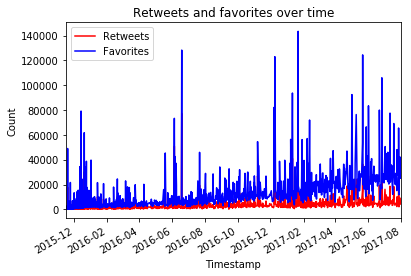

In [88]:
df_viz['retweet_count'].plot(color = 'red', label='Retweets')
df_viz['favorite_count'].plot(color = 'blue', label='Favorites')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('Retweet_time.png')

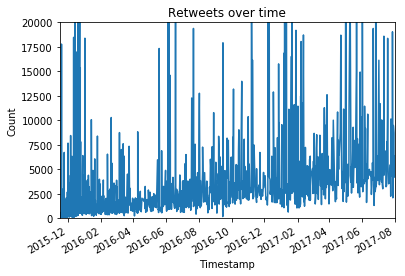

In [92]:
df_viz['retweet_count'].plot()
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.ylim(0, 20000)
plt.title('Retweets over time')
plt.savefig('Retweet_overtime.png')

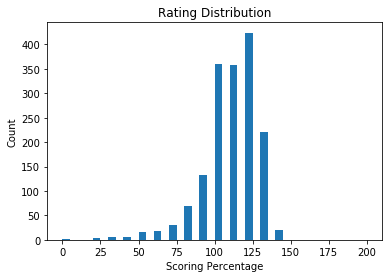

In [89]:
plt.hist(df_viz['rating_percentage'], bins=range(0, 205, 5))
plt.xlabel('Scoring Percentage')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.savefig('Rating_distribution.png')

In [93]:
df_viz.describe()

,retweet_count,favorite_count,rating_percentage
count,1666.000000,1666.000000,1666.000000
mean,2782.738896,9232.478391,108.786502
std,4859.682151,13034.745627,25.154334
min,13.000000,80.000000,0.000000
25%,628.250000,2122.500000,100.000000
50%,1399.500000,4364.500000,110.000000
75%,3172.000000,11503.500000,120.000000
max,77362.000000,143411.000000,750.000000


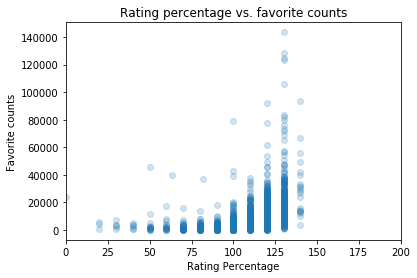

In [90]:
plt.scatter(df_viz['rating_percentage'], df_viz['favorite_count'], alpha = 1/5)
plt.xlim(0, 200)
plt.xlabel('Rating Percentage')
plt.ylabel('Favorite counts')
plt.title('Rating percentage vs. favorite counts')
plt.savefig('Rating_percent_Favorite_count.png')